###### Name : 게임의 이름입니다.
######Platform : 게임이 지원되는 플랫폼의 이름입니다.
######Year : 게임이 출시된 연도입니다.
######Genre : 게임의 장르입니다.
######Publisher : 게임을 제작한 회사입니다.
######NA_Sales : 북미지역에서의 출고량입니다.
######EU_Sales : 유럽지역에서의 출고량입니다.
######JP_Sales : 일본지역에서의 출고량입니다.
######Other_Sales : 기타지역에서의 출고량입니다.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
upload = files.upload()

Saving vgames2.csv to vgames2 (1).csv


In [12]:
gm = pd.read_csv('vgames2.csv')
gm
# 데이터 불러오기

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


# 0. 데이터 전처리

In [ ]:
gm.duplicated().sum()
# 중복 데이터 없음

0

In [13]:
gm = gm.drop('Unnamed: 0',axis=1)
gm.head()
# 불필요한 첫번째 열 제거

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [14]:
gm = gm.loc[~gm['NA_Sales'].str.contains('K|M')]
gm = gm.loc[~gm['EU_Sales'].str.contains('K|M')]
gm = gm.loc[~gm['JP_Sales'].str.contains('K|M')]
gm = gm.loc[~gm['Other_Sales'].str.contains('K|M')]
gm = gm.reset_index(drop=True)
gm.head()
# 출고량에 K,M 이 들어있는 행 삭제

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
gm.info()
# 열 타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15813 entries, 0 to 15812
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         15813 non-null  object 
 1   Platform     15813 non-null  object 
 2   Year         15559 non-null  float64
 3   Genre        15765 non-null  object 
 4   Publisher    15756 non-null  object 
 5   NA_Sales     15813 non-null  object 
 6   EU_Sales     15813 non-null  object 
 7   JP_Sales     15813 non-null  object 
 8   Other_Sales  15813 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [15]:
gm['NA_Sales'] = gm['NA_Sales'].astype(float)
gm['EU_Sales'] = gm['EU_Sales'].astype(float)
gm['JP_Sales'] = gm['JP_Sales'].astype(float)
gm['Other_Sales'] = gm['Other_Sales'].astype(float)
gm
# 국가별 출고에 대하여 데이터 타입 실수로 변환

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
15808,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
15809,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
15810,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
15811,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


# 1. 지역에 따라 선호하는 게임 장르가 다를까?

In [23]:
## 1. 지역에 따라 선호하는 게임 장르가 다를까
# 필요한 데이터 - 장르 와 국가별 출고량 데이터만 추출
gm1 = gm.loc[:,['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
gm1

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,0.04,0.00,0.00,0.00
1,Action,0.17,0.00,0.00,0.01
2,Adventure,0.00,0.00,0.02,0.00
3,Misc,0.04,0.00,0.00,0.00
4,Platform,0.12,0.09,0.00,0.04
...,...,...,...,...,...
15808,Platform,0.15,0.04,0.00,0.01
15809,Action,0.01,0.00,0.00,0.00
15810,Sports,0.44,0.19,0.03,0.13
15811,Action,0.05,0.05,0.25,0.03


In [24]:
gm1.isnull().sum()
# 결측값 확인

Genre          48
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

In [25]:
# 장르 결측값 제거
gm1 = gm1.dropna()
gm1 = gm1.reset_index(drop=True)
gm1

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,0.04,0.00,0.00,0.00
1,Action,0.17,0.00,0.00,0.01
2,Adventure,0.00,0.00,0.02,0.00
3,Misc,0.04,0.00,0.00,0.00
4,Platform,0.12,0.09,0.00,0.04
...,...,...,...,...,...
15760,Platform,0.15,0.04,0.00,0.01
15761,Action,0.01,0.00,0.00,0.00
15762,Sports,0.44,0.19,0.03,0.13
15763,Action,0.05,0.05,0.25,0.03


In [26]:
gm1_s = gm1.groupby(['Genre']).sum()
gm1_s
# 장르별 지역별 출고량


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,819.77,495.89,152.00,178.77
Adventure,101.62,61.38,49.36,16.23
Fighting,213.60,95.68,83.15,34.87
Misc,393.89,204.75,101.03,71.46
Platform,414.80,186.21,123.31,48.22
Puzzle,120.19,50.26,56.84,12.26
Racing,337.65,225.46,51.58,74.32
Role-Playing,296.32,167.37,322.85,53.11
Shooter,551.62,296.84,37.29,97.81


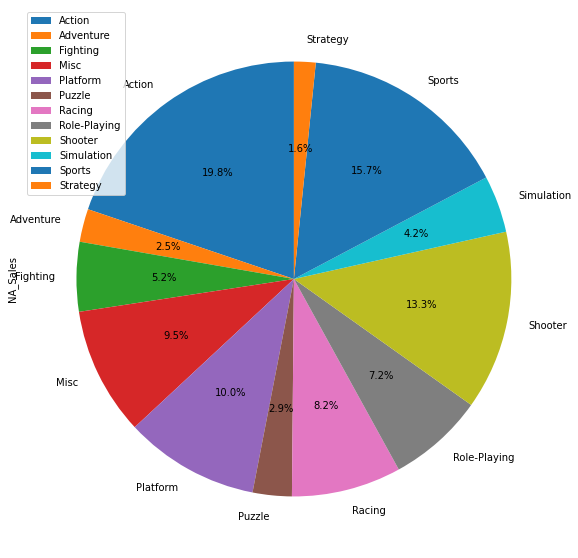

In [27]:
gm1.groupby('Genre')['NA_Sales'].sum().plot(kind='pie', legend =True,autopct = '%1.1f%%',figsize = (10,10),startangle=90,counterclock = True)
#북미 장르별 출고량

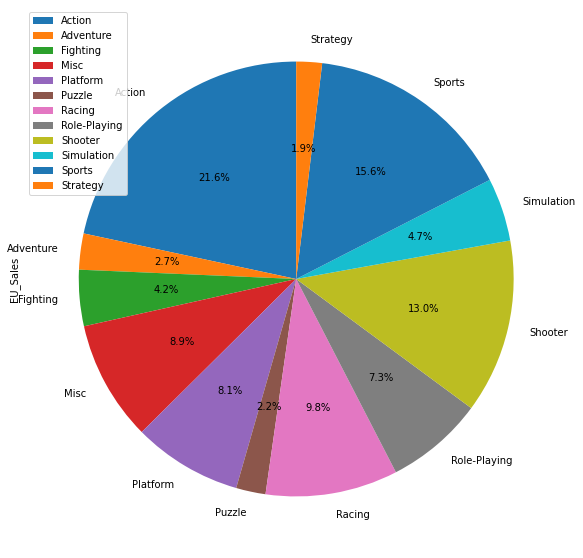

In [28]:
gm1.groupby('Genre')['EU_Sales'].sum().plot(kind='pie', legend =True,autopct = '%1.1f%%',figsize = (10,10),startangle=90,counterclock = True)
# 유럽 장르별 출고량

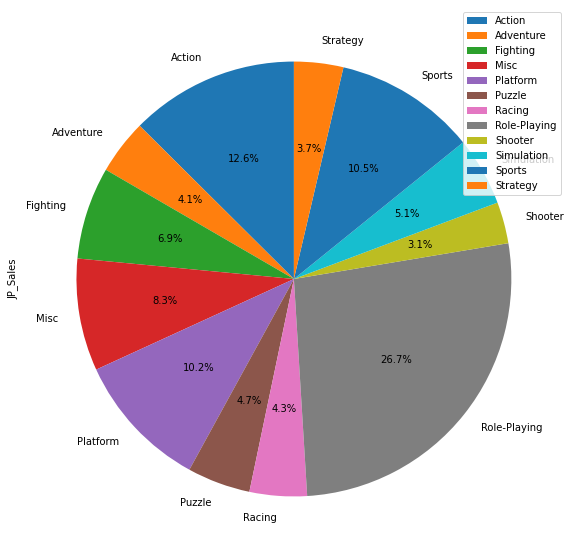

In [29]:
gm1.groupby('Genre')['JP_Sales'].sum().plot(kind='pie', legend =True,autopct = '%1.1f%%',figsize = (10,10),startangle=90,counterclock = True)
# 일본 장르별 출고량

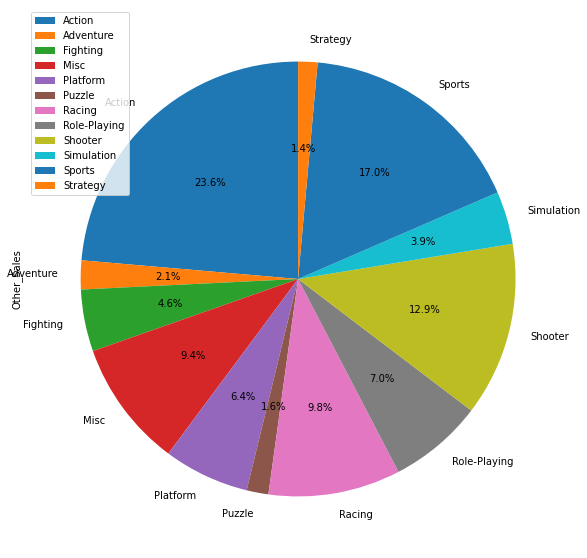

In [30]:
gm1.groupby('Genre')['Other_Sales'].sum().plot(kind='pie', legend =True,autopct = '%1.1f%%',figsize = (10,10),startangle=90,counterclock = True)
# 그 외 국가 장르별 출고량

In [31]:
# 1. 지역에 따라 선호하는 게임 장르가 있을까
# 카이제곱 독립성 검정으로 지역과 장르 두 변수 간의 연관성을 파악해보고자 한다.
# 귀무가설 : 지역에 따라 선호하는 게임 장르의 차이가 없다.
# 대립가설 : 지역에 따라 선호하는 게임 장르의 연관성이 있다.
import scipy.stats
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(observed = gm1_s)
p
# p<0.05 이므로 유의 수준 0.05에서
# 통계적으로 지역에 따라 선호하는 게임 장르는 연관성이 있다고 볼 수 있다.

6.597927220424632e-118

###★ 통계적으로 지역에 따라 선호하는 게임 장르는 **연관성이 있다고 볼 수 있다.**

# 2. 지역에 따라 선호하는 플랫폼이 다를까?

In [32]:
gm2 = gm.loc[:,['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
gm2.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,DS,0.04,0.00,0.00,0.00
1,Wii,0.17,0.00,0.00,0.01
2,PSP,0.00,0.00,0.02,0.00
3,DS,0.04,0.00,0.00,0.00
4,PS3,0.12,0.09,0.00,0.04


In [33]:
gm2.isnull().sum()

Platform       0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

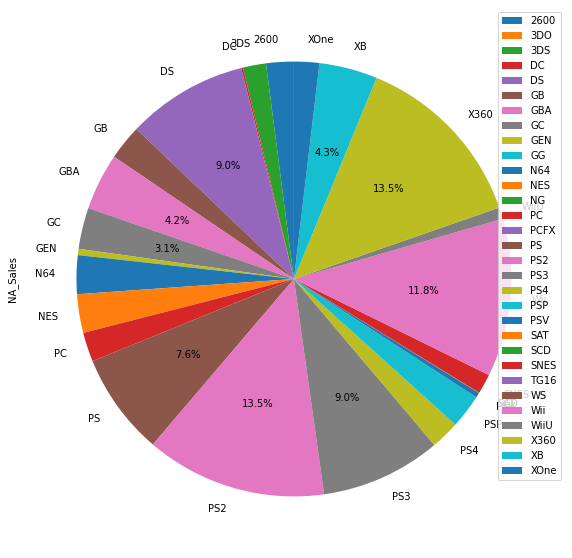

In [34]:
gm2.groupby('Platform')['NA_Sales'].sum().plot(kind='pie', legend =True,autopct=lambda x : '{:.1f}%'.format(x) if x>3 else " ",figsize = (10,10),startangle=90,counterclock = True)
#북미 장르별 출고량

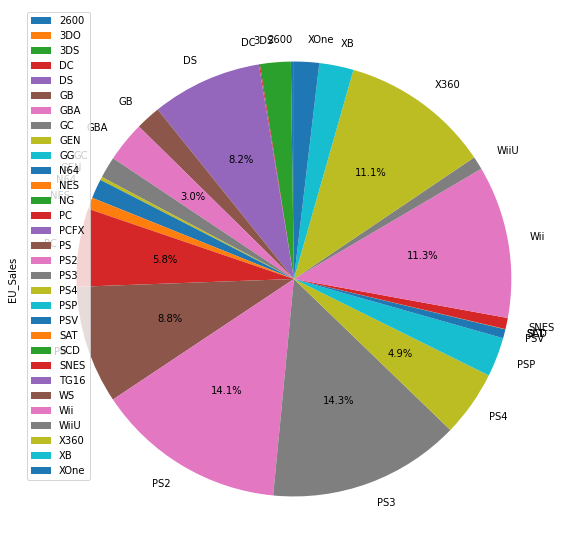

In [35]:
gm2.groupby('Platform')['EU_Sales'].sum().plot(kind='pie', legend =True,autopct=lambda x : '{:.1f}%'.format(x) if x>3 else " ",figsize = (10,10),startangle=90,counterclock = True)
#유럽 장르별 출고량

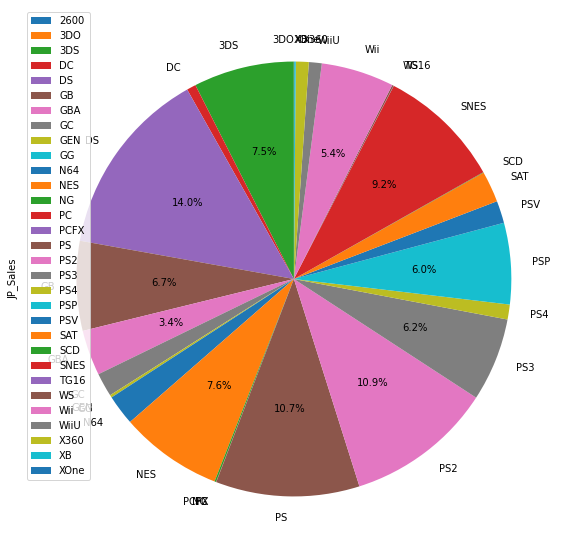

In [36]:
gm2.groupby('Platform')['JP_Sales'].sum().plot(kind='pie', legend =True,autopct=lambda x : '{:.1f}%'.format(x) if x>3 else " ",figsize = (10,10),startangle=90,counterclock = True)
#일본 장르별 출고량

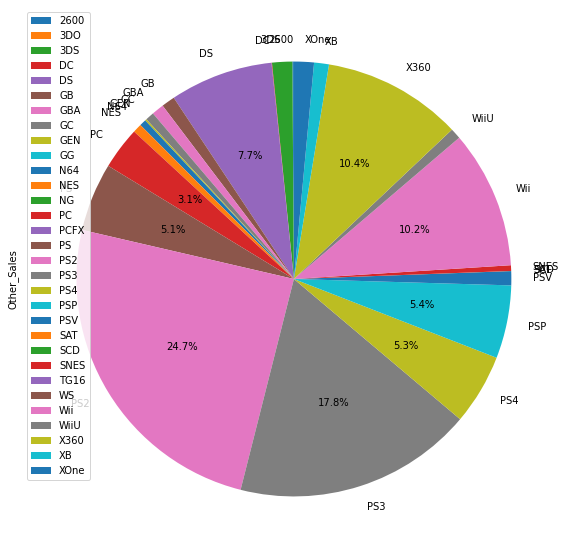

In [37]:
gm2.groupby('Platform')['Other_Sales'].sum().plot(kind='pie', legend =True,autopct=lambda x : '{:.1f}%'.format(x) if x>3 else " ",figsize = (10,10),startangle=90,counterclock = True)
#그 외 국가 장르별 출고량

In [38]:
gm2_s = gm2.groupby(['Platform']).sum()
gm2_s.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,
2600,85.21,5.16,0.00,0.86
3DO,0.00,0.00,0.10,0.00
3DS,71.11,52.43,91.15,11.40
DC,5.43,1.69,8.33,0.27
DS,373.74,188.57,170.93,58.42


In [39]:
# 2. 지역에 따라 선호하는 플랫폼이 있을까
# 카이제곱 독립성 검정으로 지역과 플랫폼 두 변수 간의 연관성을 파악해보고자 한다.
# 귀무가설 : 지역에 따라 선호하는 게임 플랫폼이 없다.
# 대립가설 : 지역에 따라 선호하는 게임 플랫폼이 있다.
import scipy.stats
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(observed = gm2_s)
p

# p<0.05 이므로 유의 수준 0.05에서
# 통계적으로 지역에 따라 선호하는 게임 플랫폼은 연관성이 있다고 볼 수 있다.

6.388908202160883e-302

###★ 통계적으로 지역에 따라 선호하는 게임 플랫폼도 **연관성이 있다고 볼 수 있다.**

# 3. 지역별 출고 TOP5

In [40]:
gm1_s['World']= gm1_s.sum(axis=1)

a = gm1_s.sort_values('NA_Sales', ascending=False).reset_index()
b = gm1_s.sort_values('EU_Sales', ascending=False).reset_index()
c = gm1_s.sort_values('JP_Sales', ascending=False).reset_index()
d = gm1_s.sort_values('Other_Sales', ascending=False).reset_index()
e = gm1_s.sort_values('World', ascending=False).reset_index()

top = pd.DataFrame([a.iloc[0:5,0],b.iloc[0:5,0],c.iloc[0:5,0],d.iloc[0:5,0],e.iloc[0:5,0]])
top = top.transpose()
top.columns=['NA','EU','JP','Other','World']
top.index=[1,2,3,4,5]
top
# 각 지역을 기준으로 정렬하여 출고량이 많은 장르 순서로 Top5 추출, (전세계 기준 추가)

,NA,EU,JP,Other,World
1,Action,Action,Role-Playing,Action,Action
2,Sports,Sports,Action,Sports,Sports
3,Shooter,Shooter,Sports,Shooter,Shooter
4,Platform,Racing,Platform,Racing,Role-Playing
5,Misc,Misc,Misc,Misc,Platform


In [41]:
gm2_s['World']= gm2_s.sum(axis=1)

a = gm2_s.sort_values('NA_Sales', ascending=False).reset_index()
b = gm2_s.sort_values('EU_Sales', ascending=False).reset_index()
c = gm2_s.sort_values('JP_Sales', ascending=False).reset_index()
d = gm2_s.sort_values('Other_Sales', ascending=False).reset_index()
e = gm2_s.sort_values('World', ascending=False).reset_index()

top = pd.DataFrame([a.iloc[0:5,0],b.iloc[0:5,0],c.iloc[0:5,0],d.iloc[0:5,0],e.iloc[0:5,0]])
top = top.transpose()
top.columns=['NA','EU','JP','Other','World']
top.index=[1,2,3,4,5]
top
# 각 지역을 기준으로 정렬하여 출고량이 많은 플랫폼 순서로 Top5 추출, (전세계 기준 추가)

,NA,EU,JP,Other,World
1,X360,PS3,DS,PS2,PS2
2,PS2,PS2,PS2,PS3,PS3
3,Wii,Wii,PS,X360,X360
4,DS,X360,SNES,Wii,Wii
5,PS3,PS,NES,DS,DS


###★ 일본을 제외하고 Action 장르가 1위이며, 전체 판매량 1위도 Action임을 알 수 있다. 또한, Role-Playing 장르는 일본을 제외하면 순위권에 없으나 전체 4위일만큼 일본에서 압도적인 1위임을 알 수 있다.
###★ PS2가 1위, PS3가 2위인 만큼 세계적으로 플레이스테이션의 인기가 가장 높음을 알 수 있다. 장르만큼의 확연한 차이는 아니지만 일본의 순위가 타 지역과 조금 상이함을 볼 수 있다.

# 4. 연도별 게임 트렌드가 있을까

In [42]:
## 4. 연도별 게임 트렌드가 있을까
# 필요한 데이터 - 출시 연도와 게임 플랫폼, 장르 데이터, 전체 출고량만 추출
gm4 = gm.loc[:,['Year','Platform','Genre']]
gm4['Sales'] = gm.iloc[:,5:9].sum(axis=1)
gm4

,Year,Platform,Genre,Sales
0,2008.0,DS,Action,0.04
1,2009.0,Wii,Action,0.18
2,2010.0,PSP,Adventure,0.02
3,2010.0,DS,Misc,0.04
4,2010.0,PS3,Platform,0.25
...,...,...,...,...
15808,2006.0,GC,Platform,0.20
15809,2005.0,PSP,Action,0.01
15810,2015.0,PS3,Sports,0.79
15811,2013.0,PSV,Action,0.38


In [43]:
gm4.isnull().sum()
# 결측값 갯수 확인

Year        254
Platform      0
Genre        48
Sales         0
dtype: int64

In [44]:
gm4 = gm4.dropna()
gm4 = gm4.reset_index(drop=True)
gm4
# 결측값 제거

,Year,Platform,Genre,Sales
0,2008.0,DS,Action,0.04
1,2009.0,Wii,Action,0.18
2,2010.0,PSP,Adventure,0.02
3,2010.0,DS,Misc,0.04
4,2010.0,PS3,Platform,0.25
...,...,...,...,...
15506,2006.0,GC,Platform,0.20
15507,2005.0,PSP,Action,0.01
15508,2015.0,PS3,Sports,0.79
15509,2013.0,PSV,Action,0.38


In [45]:
gm4 = gm4[(gm4['Year']>1)]
gm4 = gm4.reset_index(drop=True)
gm4['Year'] = gm4['Year'].astype(int)
gm4 = gm4.sort_values('Year', ascending=True).reset_index()
gm4
# 1보다 작은 연도 행 삭제 후 정수로 타입 변경, 그리고 연도별 오름차순 정렬

,index,Year,Platform,Genre,Sales
0,14596,2,PS2,Racing,0.13
1,10438,2,GC,Misc,0.07
2,7631,2,XB,Sports,0.01
3,1157,3,PS2,Platform,2.78
4,8212,3,GBA,Platform,0.03
...,...,...,...,...,...
15501,5972,2016,PC,Racing,0.01
15502,14382,2016,PS3,Action,0.02
15503,14241,2017,PSV,Role-Playing,0.01
15504,4989,2017,PSV,Action,0.01


In [46]:
# 정렬해보니 2,3 같은 year 존재
gm4 = gm4[(gm4['Year']>100)]
gm4 = gm4.reset_index(drop=True)
gm4 = gm4.iloc[:,1:]
gm4
# 100이하 year 삭제 후 재정렬

,Year,Platform,Genre,Sales
0,1980,2600,Misc,0.27
1,1980,2600,Action,0.34
2,1980,2600,Shooter,2.76
3,1980,2600,Misc,1.15
4,1980,2600,Misc,1.05
...,...,...,...,...
15412,2016,PC,Racing,0.01
15413,2016,PS3,Action,0.02
15414,2017,PSV,Role-Playing,0.01
15415,2017,PSV,Action,0.01


In [93]:
gm4_g = pd.crosstab(gm4['Year'], gm4['Genre'], rownames=['Year'], colnames=['Genre'])
gm4_g

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,1,0,1,3,0,0,0,0,2,0,0,0
1981,24,0,0,0,3,2,1,0,10,1,4,0
1982,18,0,0,1,5,3,2,0,5,0,2,0
1983,7,1,0,1,5,1,0,0,1,0,1,0
1984,1,0,0,1,1,3,2,0,3,0,2,0
1985,2,0,1,0,3,4,0,0,1,1,1,0
1986,6,0,0,0,5,0,1,1,4,0,2,0
1987,2,1,2,0,2,0,0,3,2,0,4,0
1988,2,0,0,0,3,1,1,3,1,1,2,0


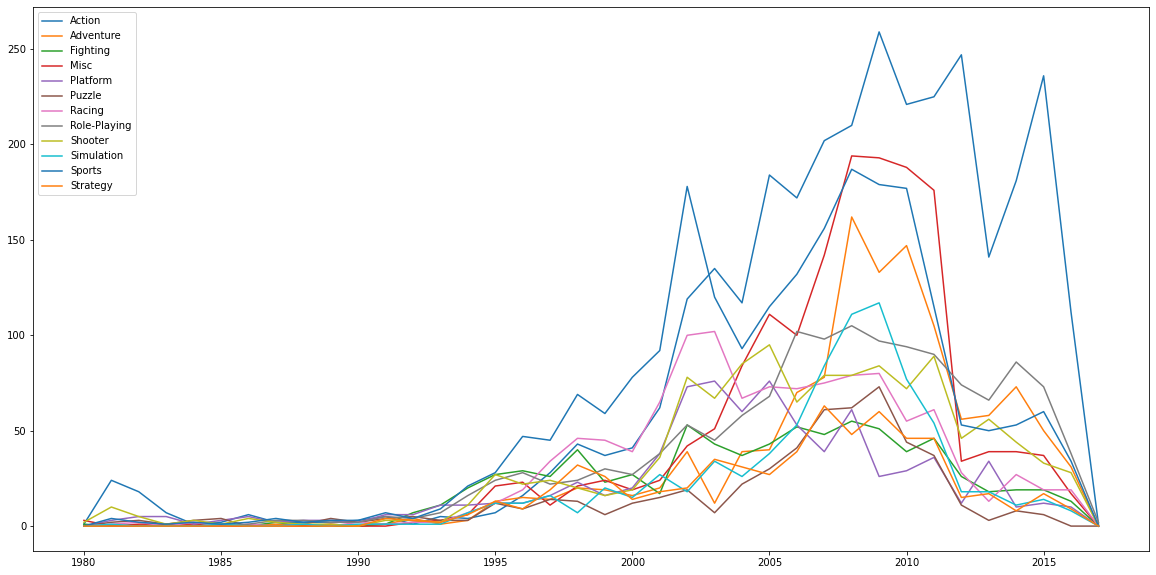

In [48]:
plt.figure(figsize=(20,10))
l = ('Action','Adventure','Fighting','Misc','Platform','Puzzle','Racing','Role-Playing','Shooter','Simulation','Sports','Strategy')
plt.plot(gm4_g)
plt.legend(l)
#연도별 장르 출시량 추이

In [49]:
gm4_gs = gm4['Sales'].groupby([gm4['Year'],gm4['Genre']]).sum()
gm4_gs = gm4_gs.unstack().fillna(0)
gm4_gs.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,0.34,0.0,0.77,2.47,0.00,0.00,0.00,0.0,7.07,0.00,0.00,0.0
1981,12.82,0.0,0.00,0.00,6.92,2.25,0.48,0.0,10.02,0.44,0.78,0.0
1982,6.50,0.0,0.00,0.87,5.03,10.04,1.57,0.0,3.81,0.00,1.06,0.0
1983,2.86,0.4,0.00,2.14,6.93,0.78,0.00,0.0,0.49,0.00,3.20,0.0
1984,1.85,0.0,0.00,1.45,0.69,3.14,4.43,0.0,31.10,0.00,6.17,0.0


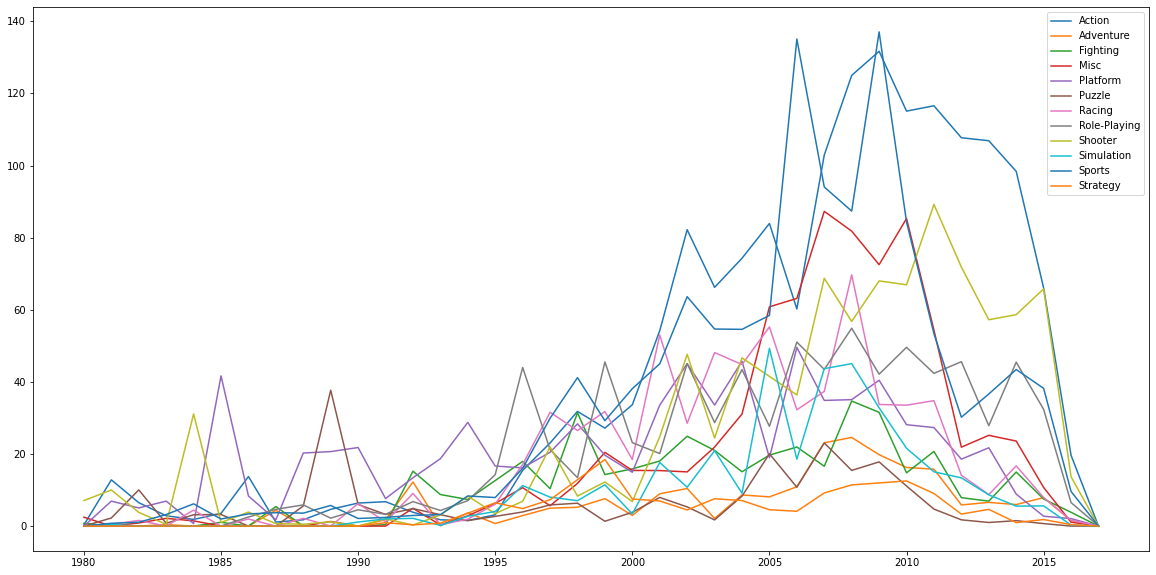

In [50]:
plt.figure(figsize=(20,10))
l = ('Action','Adventure','Fighting','Misc','Platform','Puzzle','Racing','Role-Playing','Shooter','Simulation','Sports','Strategy')
plt.plot(gm4_gs)
plt.legend(l)
#연도별 장르 출고량 추이

###★ 연도별로 선호하는 게임 장르는 큰 변동이 없는 것으로 보여지며, Action 장르가 오랜 시간 다양하게 출시되었음을 알 수 있다. 또한, 잠시 주춤하였다가 최근 다시 출시 트렌드가 된 것을 확인할 수 있다. 그 외 대부분 장르들은 출시가 줄어드는 추세임을 확인할 수 있다.

In [51]:
top2 = pd.DataFrame([e.iloc[0:10,0]])
top2
#  출고량이 많은 플랫폼 Top10 추출

,0,1,2,3,4,5,6,7,8,9
Platform,PS2,PS3,X360,Wii,DS,PS,GBA,PSP,PS4,XB


In [106]:

gm4_a = pd.DataFrame(gm4.loc[gm4['Platform']=='PS2'])
gm4_b = pd.DataFrame(gm4.loc[gm4['Platform']=='PS3'])
gm4_c = pd.DataFrame(gm4.loc[gm4['Platform']=='X360'])
gm4_d = pd.DataFrame(gm4.loc[gm4['Platform']=='Wii'])
gm4_e = pd.DataFrame(gm4.loc[gm4['Platform']=='DS'])
gm4_f = pd.DataFrame(gm4.loc[gm4['Platform']=='PS'])
gm4_g = pd.DataFrame(gm4.loc[gm4['Platform']=='GBA'])
gm4_h = pd.DataFrame(gm4.loc[gm4['Platform']=='PSP'])
gm4_i = pd.DataFrame(gm4.loc[gm4['Platform']=='PS4'])
gm4_j = pd.DataFrame(gm4.loc[gm4['Platform']=='XB'])
gm4_p = pd.concat([gm4_a,gm4_b,gm4_c,gm4_d,gm4_e,gm4_f,gm4_g,gm4_h,gm4_i,gm4_j],ignore_index=True)
gm4_p




,Year,Platform,Genre,Sales
0,2000,PS2,Shooter,0.44
1,2000,PS2,Simulation,0.80
2,2000,PS2,Sports,0.96
3,2000,PS2,Sports,1.65
4,2000,PS2,Sports,0.35
...,...,...,...,...
11726,2006,XB,Sports,0.19
11727,2007,XB,Sports,0.08
11728,2007,XB,Sports,0.29
11729,2007,XB,Action,0.18


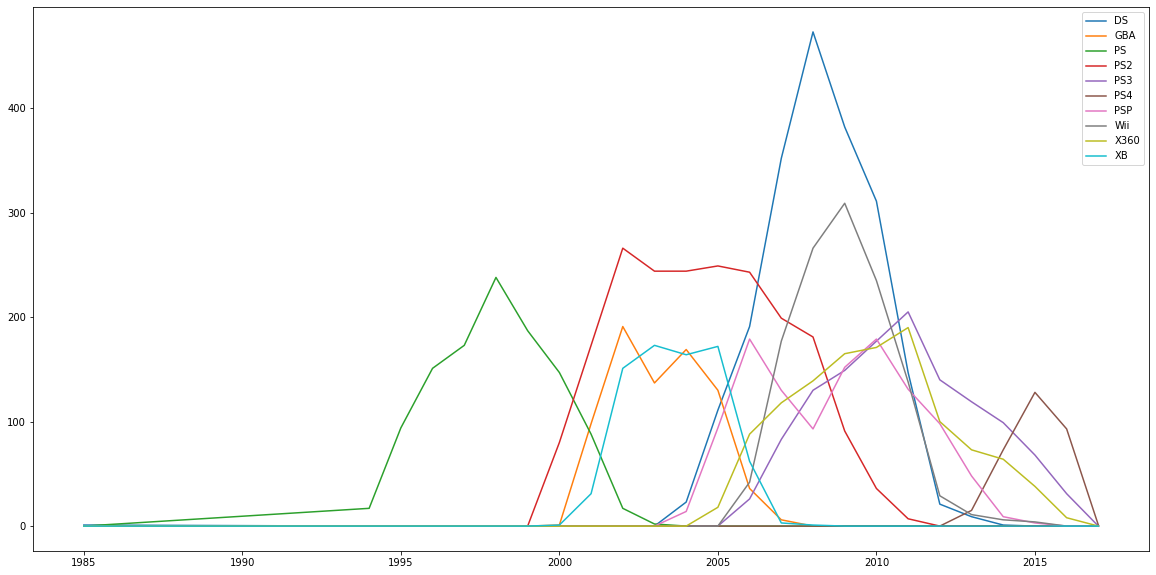

In [107]:
gm4_p = pd.crosstab(gm4_p['Year'], gm4_p['Platform'], rownames=['Year'], colnames=['Platform'])
plt.figure(figsize=(20,10))
l = ('DS','GBA','PS','PS2','PS3','PS4','PSP','Wii','X360','XB')
plt.plot(gm4_p)
plt.legend(l)
#연도별 장르 Top10 출시량 추이

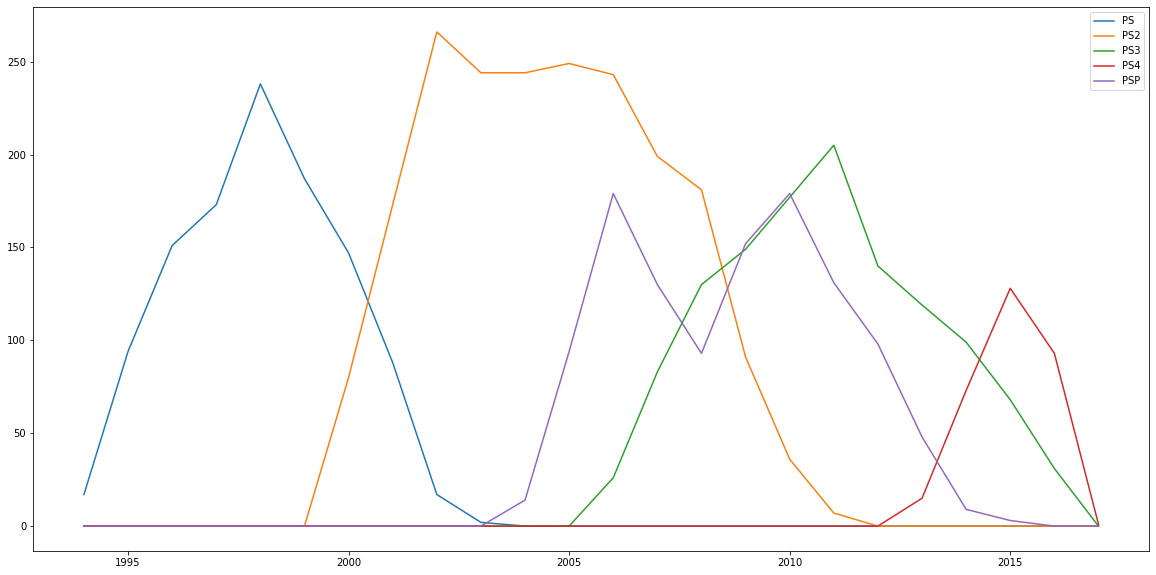

In [108]:
gm4_pp = pd.concat([gm4_a,gm4_b,gm4_f,gm4_h,gm4_i],ignore_index=True)
gm4_pp = pd.crosstab(gm4_pp['Year'], gm4_pp['Platform'], rownames=['Year'], colnames=['Platform'])
plt.figure(figsize=(20,10))
l = ('PS','PS2','PS3','PS4','PSP')
plt.plot(gm4_pp)
plt.legend(l)
#연도별 ps 출시량 추이

No handles with labels found to put in legend.


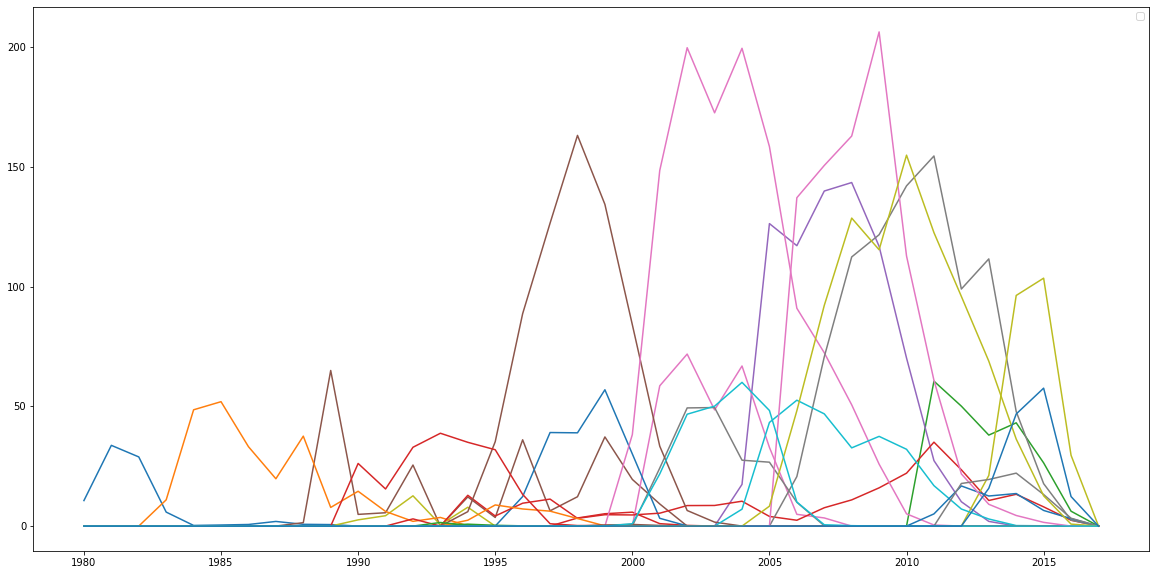

In [90]:
gm4_ps = gm4['Sales'].groupby([gm4['Year'],gm4['Platform']]).sum()
gm4_ps = gm4_ps.unstack().fillna(0)

plt.figure(figsize=(20,10))
plt.plot(gm4_ps)
plt.legend()

#연도별 장르 Top10 출고량 추이

###★ 각 플랫폼이 특정 기간에 솟아있는 것으로 보아 게임 플랫폼은 연도별 트렌드가 존재함을 확인할 수 있다. 기존 유행이었던 PS3로 시작하여 Wii와 DS를 거쳐 다시 PS로 출시 흐름이 바뀌는 것을 볼 수 있다. 또한 최근은 다양해진 플랫폼으로 특정 하나의 플랫폼으로 쏠리기보다는 다양한 플랫폼에서 출시되는 경향을 보임을 확인할 수 있다.

# 5. 출고량 높은 게임에 대한 분석

In [55]:
gm5 = gm[gm.Year > 2012]
gm5 = gm5.dropna()
gm5['Year'] = gm5['Year'].astype(int)
gm5 = gm5.reset_index(drop=True)
gm5
# 최근 5년간 게임 출고 데이터 추출

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Hajime no Ippo: The Fighting! (2014),PS3,2014,Sports,Namco Bandai Games,0.00,0.00,0.03,0.00
1,Grand Kingdom,PS4,2015,Role-Playing,Nippon Ichi Software,0.02,0.00,0.03,0.00
2,Don Bradman Cricket 14,X360,2014,Sports,Tru Blu Entertainment,0.00,0.01,0.00,0.00
3,Injustice: Gods Among Us,PS3,2013,Fighting,Warner Bros. Interactive Entertainment,0.48,0.53,0.01,0.23
4,Mario & Luigi: Paper Jam & Mario Kart 7 Double...,3DS,2015,Misc,Nintendo,0.00,0.00,0.01,0.00
...,...,...,...,...,...,...,...,...,...
1961,Grand Theft Auto V,PC,2015,Action,Take-Two Interactive,0.36,0.64,0.00,0.08
1962,Yoru no Nai Kuni,PS4,2015,Role-Playing,Tecmo Koei,0.00,0.00,0.08,0.00
1963,LEGO The Hobbit,XOne,2014,Action,Warner Bros. Interactive Entertainment,0.13,0.12,0.00,0.02
1964,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13


In [56]:
gm5['Sales'] = gm5.iloc[:,5:9].sum(axis=1)
gm5

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales
0,Hajime no Ippo: The Fighting! (2014),PS3,2014,Sports,Namco Bandai Games,0.00,0.00,0.03,0.00,0.03
1,Grand Kingdom,PS4,2015,Role-Playing,Nippon Ichi Software,0.02,0.00,0.03,0.00,0.05
2,Don Bradman Cricket 14,X360,2014,Sports,Tru Blu Entertainment,0.00,0.01,0.00,0.00,0.01
3,Injustice: Gods Among Us,PS3,2013,Fighting,Warner Bros. Interactive Entertainment,0.48,0.53,0.01,0.23,1.25
4,Mario & Luigi: Paper Jam & Mario Kart 7 Double...,3DS,2015,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01
...,...,...,...,...,...,...,...,...,...,...
1961,Grand Theft Auto V,PC,2015,Action,Take-Two Interactive,0.36,0.64,0.00,0.08,1.08
1962,Yoru no Nai Kuni,PS4,2015,Role-Playing,Tecmo Koei,0.00,0.00,0.08,0.00,0.08
1963,LEGO The Hobbit,XOne,2014,Action,Warner Bros. Interactive Entertainment,0.13,0.12,0.00,0.02,0.27
1964,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79


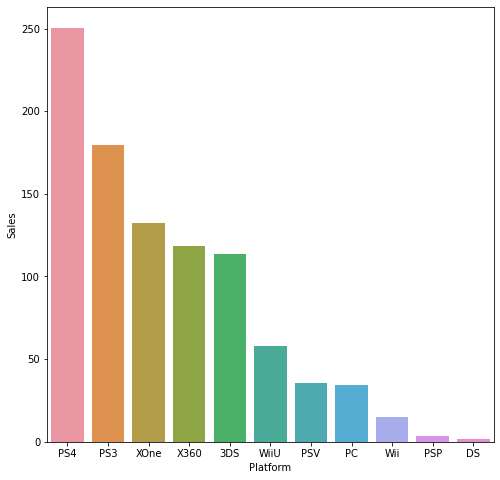

In [57]:
gm5_p = pd.DataFrame(gm5.groupby(['Platform'])['Sales'].sum())
# 최근 5년 플랫폼별 판매량
gm5_p = gm5_p.sort_values('Sales', ascending=False).reset_index()
plt.figure(figsize=(8, 8))
sns.barplot(x='Platform', y='Sales', data=gm5_p)
## 최근 5년 플랫폼별 매출 순위
# PS4 - 1위

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

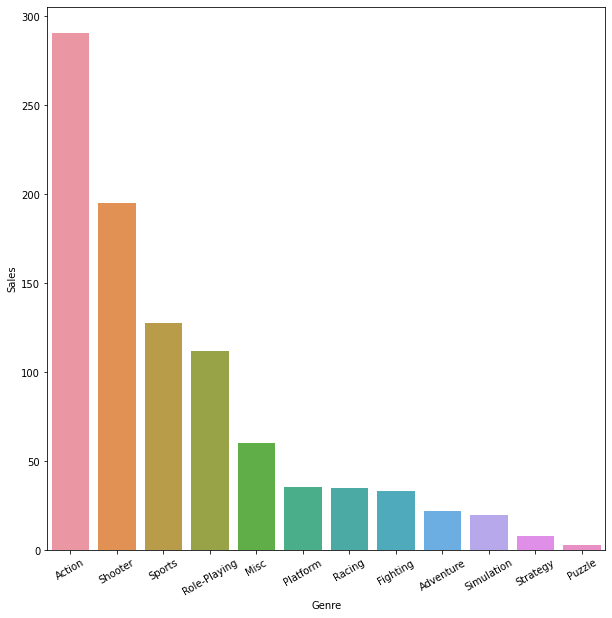

In [58]:
gm5_g = pd.DataFrame(gm5.groupby(['Genre'])['Sales'].sum())
# 최근 5년 장르별 판매량
gm5_g = gm5_g.sort_values('Sales', ascending=False).reset_index()
plt.figure(figsize=(10, 10))
sns.barplot(x='Genre', y='Sales', data=gm5_g)
plt.xticks(rotation=30) 
## 최근 5년 장르별 매출 순위
# Action - 1위

In [59]:
gm5_top = gm5.sort_values('Sales', ascending=False).reset_index()
gm5_top = gm5_top.iloc[0:10,1:]
gm5_top
# 최근 5년 게임별 매출 순위 Top 10
# Grand Theft Auto V

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales
0,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
1,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
2,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
3,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33
4,Call of Duty: Ghosts,X360,2013,Shooter,Activision,6.72,2.63,0.04,0.82,10.21
5,Call of Duty: Ghosts,PS3,2013,Shooter,Activision,4.09,3.73,0.38,1.38,9.58
6,Minecraft,X360,2013,Misc,Microsoft Game Studios,5.58,2.83,0.02,0.77,9.20
7,FIFA 16,PS4,2015,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
8,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
9,Call of Duty: Advanced Warfare,PS4,2014,Shooter,Activision,2.80,3.30,0.14,1.37,7.61


In [60]:
gm5_s = pd.DataFrame(gm5.loc[(gm5['Platform']=='PS4')&(gm5['Genre']=='Action')])
gm5_s = gm5_s.sort_values('Sales', ascending=False).reset_index()
gm5_s2 = gm5_s.iloc[:10,1:]
gm5_s2
# 플랫폼 = PS4, 장르 = Action 으로 된 게임 매출 순위 정렬

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales
0,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
1,The Last of Us,PS4,2014,Action,Sony Computer Entertainment,1.78,1.87,0.07,0.82,4.54
2,Uncharted: The Nathan Drake Collection,PS4,2015,Action,Sony Computer Entertainment,1.96,1.69,0.08,0.74,4.47
3,Watch Dogs,PS4,2014,Action,Ubisoft,1.40,1.86,0.11,0.77,4.14
4,Assassin's Creed: Unity,PS4,2014,Action,Ubisoft,1.18,1.96,0.08,0.70,3.92
5,Batman: Arkham Knight,PS4,2015,Action,Warner Bros. Interactive Entertainment,1.49,1.58,0.10,0.61,3.78
6,Metal Gear Solid V: The Phantom Pain,PS4,2015,Action,Konami Digital Entertainment,1.08,1.35,0.48,0.47,3.38
7,Assassin's Creed Syndicate,PS4,2015,Action,Ubisoft,0.80,1.92,0.06,0.50,3.28
8,Middle-Earth: Shadow of Mordor,PS4,2014,Action,Warner Bros. Interactive Entertainment,1.01,1.41,0.05,0.53,3.00
9,inFAMOUS: Second Son,PS4,2014,Action,Sony Computer Entertainment,1.27,0.97,0.07,0.47,2.78


In [61]:
gm5_pb = pd.DataFrame(gm5_s.groupby(['Publisher'])['Sales'].sum())
# 최근 5년 회사별 판매량
gm5_pb = gm5_pb.sort_values('Sales', ascending=False).reset_index()
gm5_pb = gm5_pb.iloc[0:10,:]
gm5_pb

,Publisher,Sales
0,Ubisoft,16.89
1,Warner Bros. Interactive Entertainment,15.35
2,Sony Computer Entertainment,12.98
3,Take-Two Interactive,11.99
4,Square Enix,6.09
5,Konami Digital Entertainment,4.66
6,Bethesda Softworks,2.60
7,Activision,2.12
8,Tecmo Koei,1.75
9,Hello Games,1.60


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

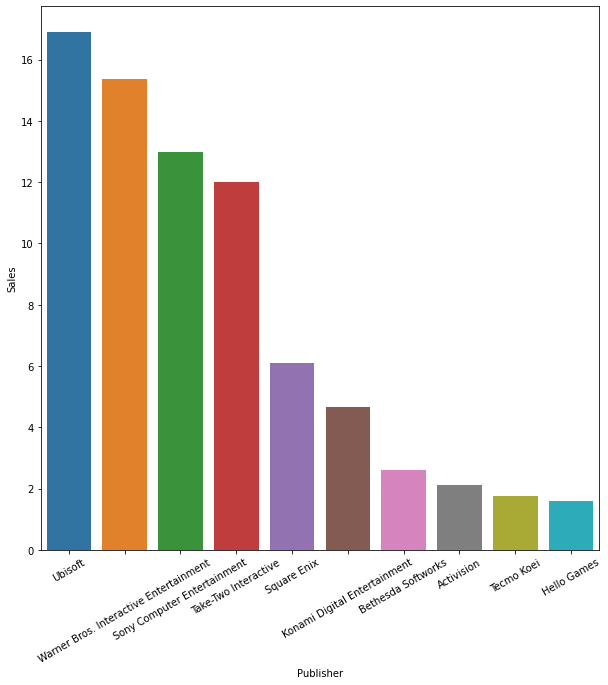

In [62]:
gm5_pb = pd.DataFrame(gm5_s.groupby(['Publisher'])['Sales'].sum())
# 최근 5년 회사별 판매량
gm5_pb = gm5_pb.sort_values('Sales', ascending=False).reset_index()
gm5_pb = gm5_pb.iloc[0:10,:]
plt.figure(figsize=(10, 10))
sns.barplot(x='Publisher', y='Sales', data=gm5_pb)
plt.xticks(rotation=30) 

## 최근 5년 회사별 매출 순위
# Ubisoft - 1위

In [63]:
na = gm5_s['NA_Sales'].sum()
eu = gm5_s['EU_Sales'].sum()
jp = gm5_s['JP_Sales'].sum()
other = gm5_s['Other_Sales'].sum()
sum = gm5_s['Sales'].sum()
round(na,2), round(eu,2), round(jp,2), round(other,2), round(sum,2)
## 최근 5년간 Action PS4 나라별 매출
# EU > NA > Other > JP

(28.15, 36.73, 5.07, 13.18, 83.13)

([<matplotlib.patches.Wedge at 0x7fcea4e26250>,
 [Text(0.5340841715739894, 0.9616413560543897, 'NA'),
  Text(-1.0239068284251533, -0.40201344094985686, 'EU'),
  Text(0.411090761522265, -1.0202962245304275, 'JP'),
  Text(0.9663466157727532, -0.5255228046284454, 'Other')],
 [Text(0.2913186390403578, 0.5245316487569398, '33.9%'),
  Text(-0.5584946336864471, -0.21928005869992193, '44.2%'),
  Text(0.22423132446668997, -0.5565252133802331, '6.1%'),
  Text(0.5270981540578653, -0.28664880252460656, '15.9%')])

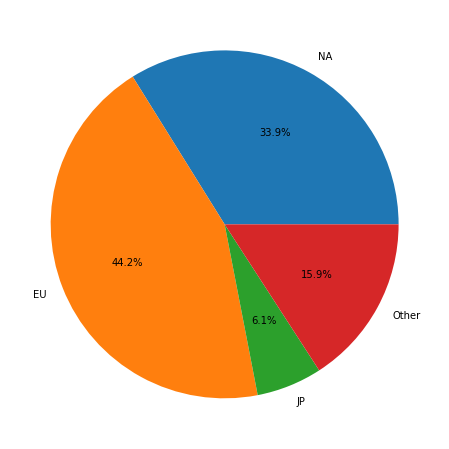

In [64]:
l = ['NA','EU','JP','Other']
sales = [28.15,36.73,5.07,13.18]
wg = {'width': 0.6}
plt.figure(figsize=(8, 8))
plt.pie(sales, labels=l, autopct='%.1f%%')

## 게임은 트렌드 변화가 빠르게 변함에 따라 최근 5년 데이터를 기반으로 시각화 진행
## 최근 5년 출고량이 가장 큰 장르 **Action**
## 최근 5년 출고량이 가장 큰 플랫폼 **PS4**
## 최근 5년, Action, PS4, 가장 많은 매출 회사 **Ubisoft**
## 최근 5년, Action, PS4, 가장 많은 매출 지역 **EU, NA**
##이러한 데이터로 보아 다음 분기 출시할 게임은
## **플랫폼 : PS4 , 장르 : Action 게임으로 북미와 유럽을 타겟으로 한다.**
### **(Grand Theft Auto V 를 참조 혹은 Ubisoft 회사 게임들을 참조 또는 협업)** 
 